In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##    📌 ETL y EDA de los archivos

**Comenzamos obervando los archivos de reclamos.**

In [27]:
reclamos1 = pd.read_csv("Reclamo_internet_fijo.csv")
reclamos2 = pd.read_csv("Reclamo_telefonía_fija.csv")
reclamos3 = pd.read_csv("Reclamo_telefonía_movil.csv")
reclamos4 = pd.read_csv("Reclamo_tipo_reclamo.csv")
reclamos5 = pd.read_csv("Reclamo_tipo_servicio.csv")

In [28]:
print(reclamos1.head())
print(reclamos2.head())
print(reclamos3.head())
print(reclamos4.head())
print(reclamos5.head())

                       Operador  Cantidad
0        Telecom Argentina S.A.     1.665
1  Telefonica de Argentina S.A.   426.000
2               TELECENTRO S.A.   478.000
3                         Otros   379.000
                       Operador  Cantidad
0        Telecom Argentina S.A.      3241
1  Telefonica de Argentina S.A.      1472
2               TELECENTRO S.A.       202
3                         Otros        70
                                       Operador  Cantidad
0                        Telecom Argentina S.A.       621
1  Movistar - Telefonica Moviles Argentina S.A.       481
2                    AMX Argentina S.A. (Claro)       248
3                                         Otros        22
             Tipo de reclamo  Cantidad
0                Facturación      1816
1  Gestiones Administrativas      2474
2                      Otros       561
3         Problemas Técnicos      5375
                           Servicio  Cantidad
0        Servicio de Telefonía Fija      5072
1  

    💣 Debido a que no son muchos los datos, a simple vista podemos observar que nuestras empresas presentan varias dificultades.

🚩 La mayor cantidad de reclamos se presentan por problemas técnicos

🚩 El servicio con mayor cantidad de reclamos es la de Telefonía fija

🚩 La empresa que mayor cantidad de reclamos tiene tanto de internet fijo como de internet móvil es Telecom. Lo mostramos en el siguiente gráfico:

(-1.0999996864201576,
 1.0999999850676265,
 -1.0999990206545533,
 1.099999902920502)

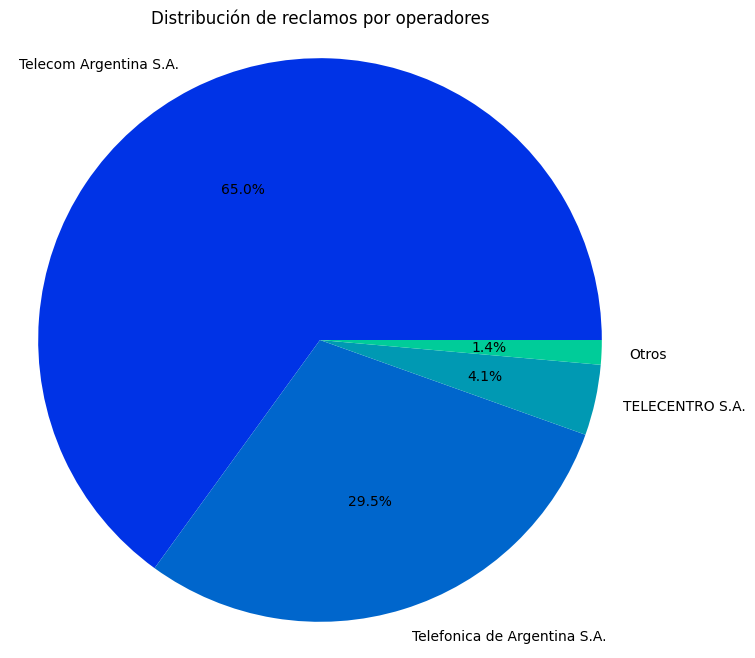

In [34]:
colores = sns.color_palette('winter', n_colors=len(reclamos2))

# Gráfico de torta de reclamo de telefonía fija
plt.figure(figsize=(8, 8))
plt.pie(reclamos2['Cantidad'], labels=reclamos2['Operador'], autopct='%1.1f%%', colors=colores)
plt.title('Distribución de reclamos por operadores')
plt.axis('equal')  

- Podemos observar claramente que Telecom Argentina S.A tiene la mayor parte de reclamos con el 65 % y su competidor más próximo es Telefonica de Argentina S.A con casi el 30 % de los reclamos. 

(-1.0999964626608092,
 1.0999998315552766,
 -1.0999966384175859,
 1.0999950241232779)

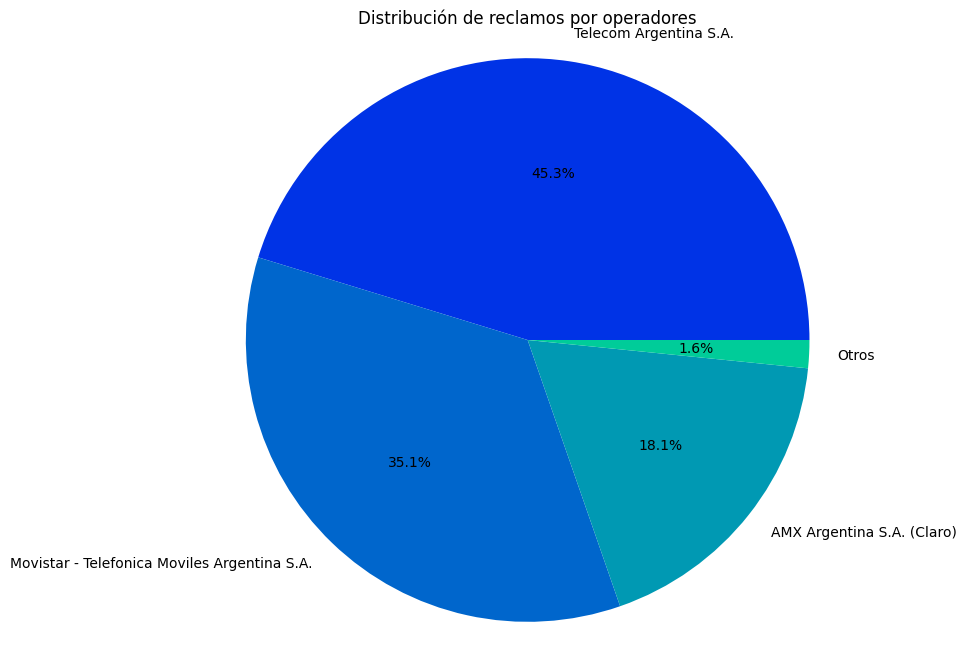

In [35]:
# Gráfico de torta de reclamo de telefonía móvil
colores = sns.color_palette('winter', n_colors=len(reclamos3))

plt.figure(figsize=(8, 8))
plt.pie(reclamos3['Cantidad'], labels=reclamos3['Operador'], autopct='%1.1f%%', colors=colores)
plt.title('Distribución de reclamos por operadores')
plt.axis('equal')  

- Como personal y telecom se unieronm el dato de Telecom Argentina S.A. corresponde a los reclamos realizados a la compañía de personal.
Los porcentajes de reclamo son muy altos en comparación a las demás empresas.

**Archivos de acceso a internet**

In [4]:
conectividad = pd.read_csv("Conectividad_internet.csv")
internet_acceso = pd.read_csv("Internet_acceso.csv")
internet_tecnologia = pd.read_csv("Internet_por_tecnologia.csv")
velociddad_bajada = pd.read_csv("Internet_por_velocidad_bajada.csv")

In [10]:
print(conectividad.head())

      Provincia       Partido      Localidad ADSL CABLEMODEM DIALUP  \
0  BUENOS AIRES  Bahía Blanca  Villa Bordeau   NO         NO     NO   
1  BUENOS AIRES  Bahía Blanca   Villa Espora   NO         NO     NO   
2  BUENOS AIRES      Balcarce       Balcarce   SI         SI     SI   
3  BUENOS AIRES      Balcarce      Los Pinos   NO         NO     NO   
4  BUENOS AIRES      Balcarce      Napaleofú   NO         NO     NO   

  FIBRAOPTICA  4G  3G TELEFONIAFIJA WIRELESS SATELITAL  
0          NO  SI  SI            NO       NO        NO  
1          NO  NO  NO            NO       NO        NO  
2          SI  SI  SI            SI       SI        NO  
3          NO  NO  NO            SI       SI        NO  
4          SI  SI  SI            SI       SI        NO  


In [9]:
# Reemplazar los valores "--" por "no" en todo el DataFrame
conectividad = conectividad.replace("--", "NO")

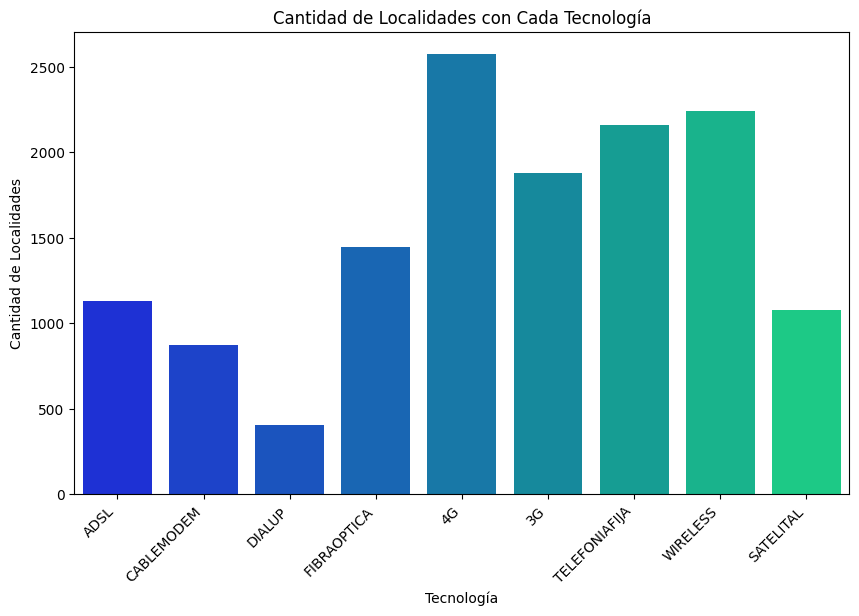

In [15]:
# Contar la cantidad de localidades con cada tecnología
tecnologias = ['ADSL', 'CABLEMODEM', 'DIALUP', 'FIBRAOPTICA', '4G', '3G', 'TELEFONIAFIJA', 'WIRELESS', 'SATELITAL']
count_localidades = conectividad[tecnologias].apply(lambda x: (x == 'SI').sum())

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=count_localidades.index, y=count_localidades.values, palette='winter')
plt.xlabel('Tecnología')
plt.ylabel('Cantidad de Localidades')
plt.title('Cantidad de Localidades con Cada Tecnología')
plt.xticks(rotation=45, ha='right')
plt.show()

- La red 4g es la tecnología que mayor alcance de cobertura tiene en el mundo de las telecomunicaciones.

- El Wireless y la Telefonia Fija son las siguientes tecnologías más usadas después del 4G

In [37]:
internet_acceso.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,"78,11"
1,2022,3,Capital Federal,"122,28"
2,2022,3,Catamarca,"65,33"
3,2022,3,Chaco,"43,86"
4,2022,3,Chubut,"84,38"


In [38]:
internet_acceso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           840 non-null    int64 
 1   Trimestre                     840 non-null    int64 
 2   Provincia                     840 non-null    object
 3   Accesos por cada 100 hogares  840 non-null    object
dtypes: int64(2), object(2)
memory usage: 26.4+ KB


In [39]:
# Eliminamos la columna Trimestre
internet_acceso.drop('Trimestre', axis=1, inplace=True)

In [40]:
# Cambiamos el tipo de dato
internet_acceso['Año'] = internet_acceso['Año'].astype(int)
internet_acceso['Accesos por cada 100 hogares'] = internet_acceso['Accesos por cada 100 hogares'].str.replace(',', '.').astype(float)

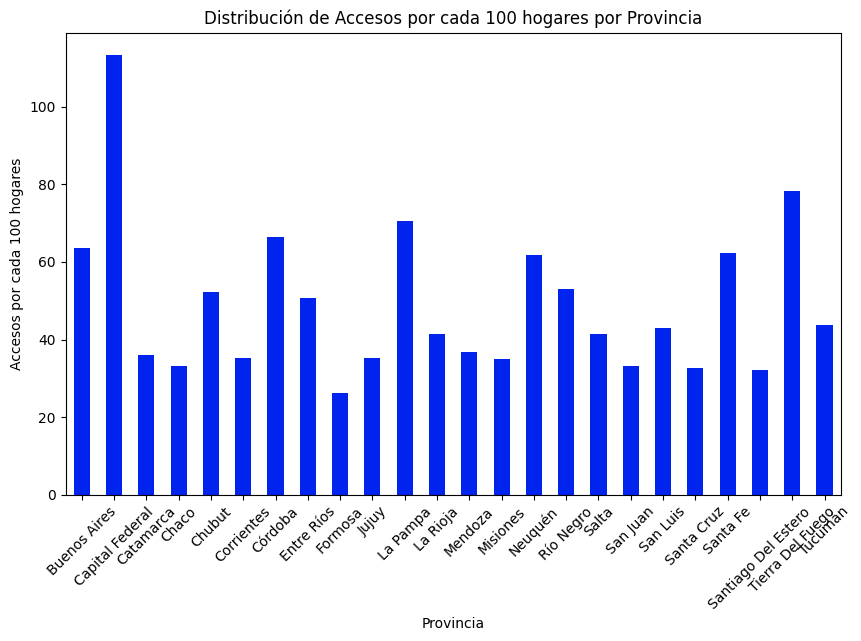

In [42]:
# Agrupamos los datos por provincia y calcular la media de los accesos por cada 100 hogares
datos_agrupados = internet_acceso.groupby('Provincia')['Accesos por cada 100 hogares'].mean()

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
datos_agrupados.plot(kind='bar')
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Distribución de Accesos por cada 100 hogares por Provincia')
plt.xticks(rotation=45)
plt.show()

- Podemos observar como los accesos a internet por provincia crecen casi de manera simultánea, las diferencias entre el crecimiento de Buenos Aires con el resto de provincias, puede estar relacionada a una mayor cantidad de problación, también a la infraestrucutura, lo que facilita una rápida incorporación en la población argentina. 

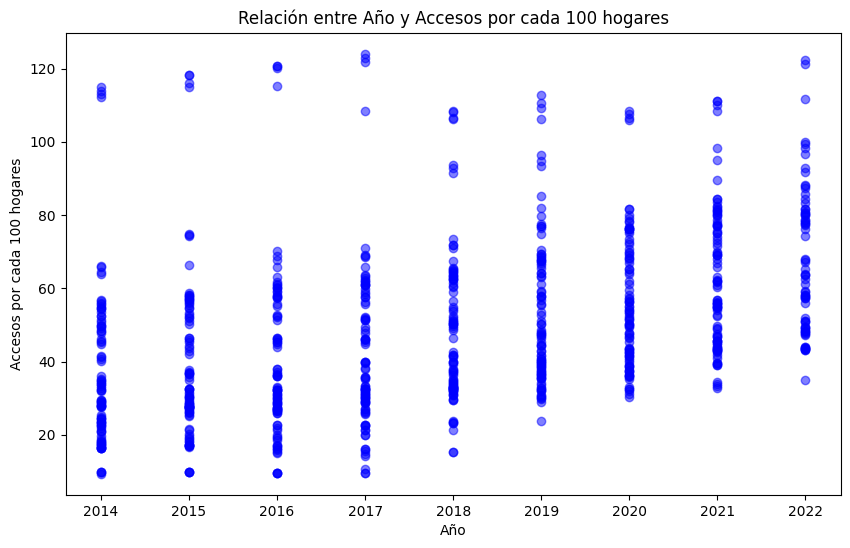

In [44]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(internet_acceso['Año'], internet_acceso['Accesos por cada 100 hogares'], c='b', alpha=0.5)
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Relación entre Año y Accesos por cada 100 hogares')
plt.show()

- En este gráfico podemos observar como es que con el pasar de los años, el acceso a la conexión de Internet en los hogares, ha ido aumentando paulatinamente, teniendo aún más rápido crecimiendo en los últimos años, esto puede tener varias causas, como la disminución en los costos para proveer internet de manera masiva, leyes que alienten el crecimiento de las telecomunicaciones, así como el mundo cada vez más globalizado. 


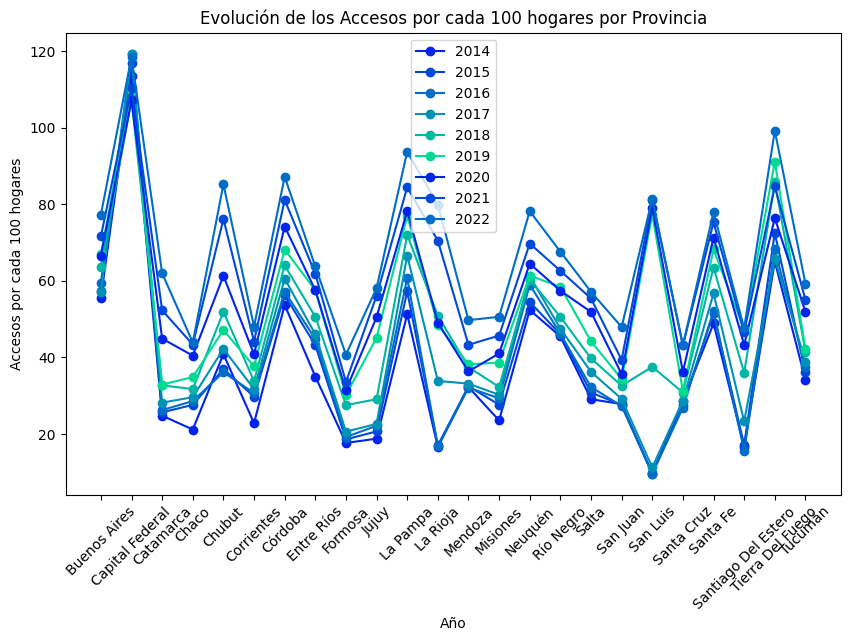

In [45]:
# Agrupar los datos por provincia y año
datos_agrupados = internet_acceso.groupby(['Provincia', 'Año'])['Accesos por cada 100 hogares'].mean().unstack()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
for provincia in datos_agrupados.columns:
    plt.plot(datos_agrupados.index, datos_agrupados[provincia], marker='o', label=provincia)
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Evolución de los Accesos por cada 100 hogares por Provincia')
plt.legend()
plt.xticks(rotation=45)
plt.show()

- En este último gráfico podemos ver claramente el movimiento de todas las provincias y su comportamiento con el Internet a lo largo de los años, creciendo poco a poco en todas las provincias, teniendo en el primer lugar a Buenos Aires, con los porcentajes más altos a nivel nacional. Esto solo nos indica que la tendencia es positiva para casi todas las provincias, con algunas que son la excepción pero la información que nos muestran los datos, es que en los próximos años, el acceso a internet por cada 100 hogares va a ir en aumento.

**Archivos de portabilidad móvil.**

In [13]:
portabilidad_movil = pd.read_csv("Portabilidad_numerica_movil.csv")

In [36]:
portabilidad_movil.head()

,Año,Mes,Personal,Claro,Nextel,Movistar,Otros
0,2022,10,60855.0,117430.0,NaN,119716.0,153.0
1,2022,9,63315.0,131071.0,NaN,115906.0,143.0
2,2022,8,68659.0,132676.0,NaN,115879.0,42.0
3,2022,7,74674.0,111849.0,NaN,111521.0,27.0
4,2022,6,77276.0,120505.0,NaN,115937.0,54.0


In [48]:
# Rellenamos los valores nulos por 0.
portabilidad_movil.fillna(0, inplace=True)
portabilidad_movil.head()

# Convertimos las columnas tipo entero,
portabilidad_movil = portabilidad_movil.astype(int)
portabilidad_movil.head()

,Año,Mes,Personal,Claro,Nextel,Movistar,Otros
0,2022,10,60855,117430,0,119716,153
1,2022,9,63315,131071,0,115906,143
2,2022,8,68659,132676,0,115879,42
3,2022,7,74674,111849,0,111521,27
4,2022,6,77276,120505,0,115937,54


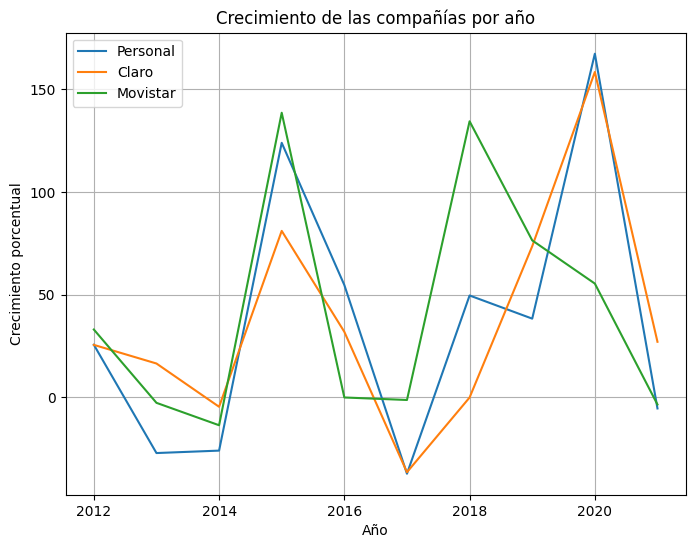

In [23]:
# Convertir las columnas relevantes a tipo numérico
portabilidad_movil['Personal'] = portabilidad_movil['Personal'].astype(float)
portabilidad_movil['Claro'] = portabilidad_movil['Claro'].astype(float)
portabilidad_movil['Movistar'] = portabilidad_movil['Movistar'].astype(float)

# Agrupar por año y calcular el crecimiento promedio anual de las compañías
crecimiento_personal = portabilidad_movil.groupby('Año')['Personal'].mean().pct_change() * 100
crecimiento_claro = portabilidad_movil.groupby('Año')['Claro'].mean().pct_change() * 100
crecimiento_movistar = portabilidad_movil.groupby('Año')['Movistar'].mean().pct_change() * 100

# Obtener los años únicos
años = portabilidad_movil['Año'].unique()

# Crear la gráfica de líneas para mostrar el crecimiento de las compañías
plt.figure(figsize=(8, 6))
plt.plot(años[1:], crecimiento_personal[1:], label='Personal')
plt.plot(años[1:], crecimiento_claro[1:], label='Claro')
plt.plot(años[1:], crecimiento_movistar[1:], label='Movistar')
plt.xlabel('Año')
plt.ylabel('Crecimiento porcentual')
plt.title('Crecimiento de las compañías por año')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

🚩 Podemos ver que las compañías Personal, Claro y Movistar han tenido altos y bajos durante estos años.

🚩 Siendo el año 2014 el año con mayor crecimiento para Personal, seguido de una caía acelerada para el año 2015. Recuperando su fuerza en el año 2017 y llegando a su pico máximo en 2020, a partir de allí, Personal ha ido decreciendo considerablemente.

🚩 Tanto personal como nuestra competencia vienen decreciendo en los últimos años. La empresa debe proponerse reapuntar su crecimiento considerando la caída de su competencia.